In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Wholesale Customer Data: The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

In [2]:
data = pd.read_csv('inputs/Wholesale_customers_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- The aim here is to make clusters that can segment similar clients together.

In [4]:
#Normalize data.
from sklearn.preprocessing import normalize

scaled_data = normalize(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [5]:
scaled_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.000105,0.000230,0.608111,0.306342,0.414267,0.185777,0.137032,0.087564
std,0.000110,0.000329,0.339614,0.216936,0.267369,0.200710,0.149245,0.089597
min,0.000008,0.000018,0.000175,0.005848,0.000143,0.000644,0.000143,0.000077
25%,0.000053,0.000092,0.285100,0.123490,0.164689,0.045811,0.020551,0.030020
50%,0.000085,0.000155,0.722229,0.251437,0.375277,0.112828,0.062453,0.062284
75%,0.000125,0.000250,0.927366,0.455574,0.654840,0.243927,0.242912,0.117928
max,0.001553,0.004660,0.999391,0.926102,0.976789,0.944218,0.903593,0.642610


- We have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk 

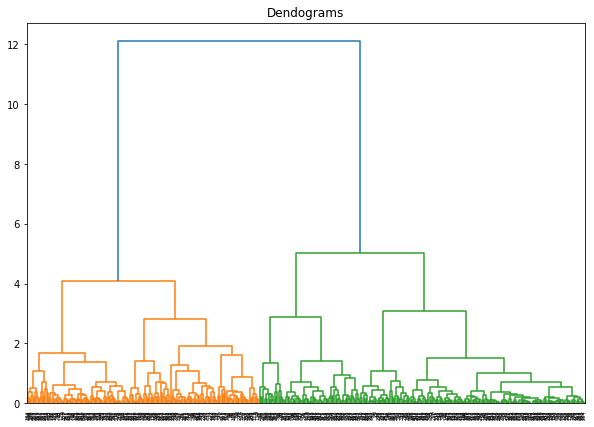

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10, 7))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(scaled_data, method = 'ward'))

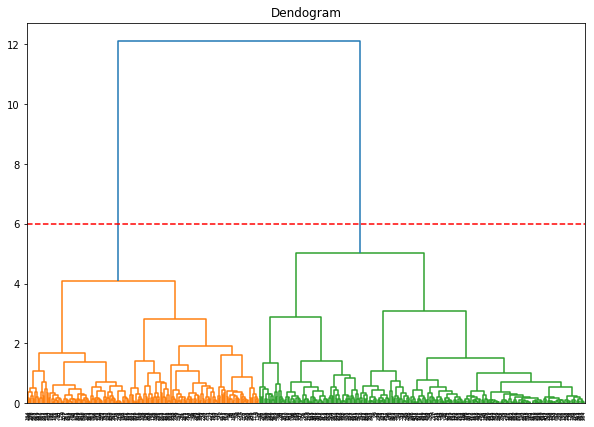

In [7]:
plt.figure(figsize = (10, 7))
plt.title('Dendogram')
dend = shc.dendrogram(shc.linkage(scaled_data, method = 'ward'))
plt.axhline(y = 6, color = 'r', linestyle = '--')

# Applying hierarchical agglomerative clustering.

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(scaled_data)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

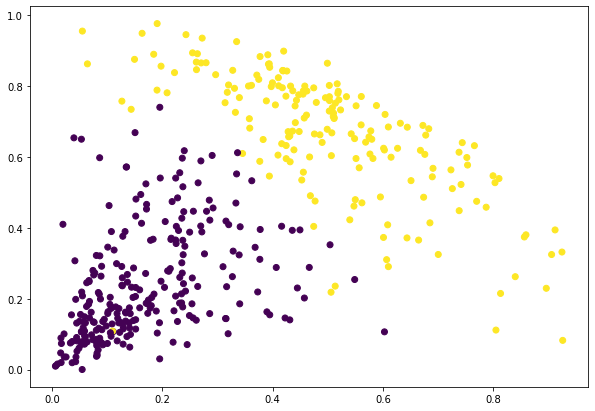

In [9]:
plt.figure(figsize = (10, 7))
plt.scatter(scaled_data['Milk'], scaled_data['Grocery'], c = cluster.labels_)

## The advantage of not having to *pre-define the number of clusters* gives it an edge over *k-Means*.